Reference: https://mc-stan.org/users/documentation/case-studies/rasch_and_2pl.html  
Dataset: https://timss2019.org/international-database/

In [6]:
import stan
import numpy as np
import matplotlib.pyplot as plt
import nest_asyncio; nest_asyncio.apply()
import pandas as pd; pd.set_option("mode.chained_assignment", None)
from itertools import product
from utils import select_columns, plot_ESS, plot_GR, plot_posterior

# columns = [column for column in pd.read_spss("data/timss/T19_G4_AUS_SPSS/asaausm7.sav").columns.tolist() if "MP" in column] # Choosing columns is time-consuming
# columns = ['ME51043A', 'ME51043B', 'ME51043C', 'ME51043D', 'ME51043E', 'ME51043F', 'ME51043G', 'ME51043H', 'ME51043', 'ME51040', 'ME51008', 'ME51031A', 'ME51031B', 'ME51508A', 'ME51508B', 'ME51508', 'ME51216A', 'ME51216B', 'ME51221', 'ME51115', 'ME51507A', 'ME51507B', 'ME71219', 'ME71021', 'ME71167A', 'ME71167B', 'ME71167C', 'ME71167D', 'ME71167E', 'ME71167F', 'ME71167', 'ME71041', 'ME71162A', 'ME71162B', 'ME71162', 'ME71078A', 'ME71078B', 'ME71078C', 'ME71078', 'ME71090', 'ME71151A', 'ME71151B', 'ME71151C', 'ME71151', 'ME71119', 'ME71217A', 'ME71217B', 'ME71142A', 'ME71142B', 'ME71142', 'ME71204A', 'ME71204B', 'ME71204C', 'ME71204', 'ME61026', 'ME61273', 'ME61034', 'ME61040', 'ME61228', 'ME61166', 'ME61171', 'ME61080', 'ME61222', 'ME61076', 'ME61084', 'ME71013', 'ME71026', 'ME71036A', 'ME71036B', 'ME71036', 'ME71040', 'ME71068', 'ME71075A', 'ME71075B', 'ME71080', 'ME71211', 'ME71178A', 'ME71178B', 'ME71178C', 'ME71178', 'ME71135A', 'ME71135B', 'ME71201', 'ME71175A', 'ME71175B', 'ME71175C', 'ME71175', 'ME51206', 'ME51052', 'ME51049', 'ME51045', 'ME51098', 'ME51030', 'ME51502', 'ME51224', 'ME51207', 'ME51427', 'ME51533', 'ME51080', 'ME61018A', 'ME61018B', 'ME61018C', 'ME61018D', 'ME61018', 'ME61274', 'ME61248', 'ME61039', 'ME61079', 'ME61179', 'ME61052', 'ME61207', 'ME61236', 'ME61266A', 'ME61266B', 'ME61266C', 'ME61266D', 'ME61266E', 'ME61266F', 'ME61266', 'ME61106', 'ME51401', 'ME51075', 'ME51402', 'ME51226', 'ME51131', 'ME51103', 'ME51217', 'ME51079', 'ME51211', 'ME51102', 'ME51009', 'ME51100', 'ME71018', 'ME71009', 'ME71037', 'ME71051', 'ME71064', 'ME71176', 'ME71169', 'ME71083', 'ME71199', 'ME71184', 'ME71141A', 'ME71141B', 'ME71141C', 'ME71141D', 'ME71141', 'ME71194A', 'ME71194B', 'ME71194', 'ME71193A', 'ME71193B', 'ME71193', 'ME71192', 'ME61275', 'ME61027', 'ME61255', 'ME61021', 'ME61043', 'ME61151', 'ME61172', 'ME61223', 'ME61269', 'ME61081A', 'ME61081B', 'ME71005', 'ME71016', 'ME71163', 'ME71045', 'ME71213A', 'ME71213B', 'ME71213C', 'ME71213', 'ME71070', 'ME71181', 'ME71179A', 'ME71179B', 'ME71179C', 'ME71179', 'ME71067', 'ME71147A', 'ME71147B', 'ME71189', 'ME71187AA', 'ME71187AB', 'ME71187AC', 'ME71187AD', 'ME71187A', 'ME71187B', 'ME61178', 'ME61246', 'ME61271', 'ME61256', 'ME61182', 'ME61049', 'ME61232', 'ME61095B', 'ME61095C', 'ME61095D', 'ME61095E', 'ME61095', 'ME61264', 'ME61108', 'ME61211A', 'ME61211B', 'ME71001', 'ME71010', 'ME71062', 'ME71216AA', 'ME71216AB', 'ME71216A', 'ME71216B', 'ME71117A', 'ME71117B', 'ME71117C', 'ME71117D', 'ME71117E', 'ME71117', 'ME71071', 'ME71098', 'ME71069', 'ME71134A', 'ME71134B', 'ME71202A', 'ME71202B', 'ME71202C', 'ME71202', 'ME71190', 'ME71218', 'ME61240A', 'ME61240B', 'ME61240C', 'ME61240', 'ME61254A', 'ME61254B', 'ME61254C', 'ME61254', 'ME61244', 'ME61041', 'ME61173', 'ME61252', 'ME61261', 'ME61224', 'ME61077', 'ME61069A', 'ME61069B', 'ME71024', 'ME71008', 'ME71165', 'ME71049', 'ME71063', 'ME71079', 'ME71081', 'ME71094', 'ME71177', 'ME71206', 'ME71138AA', 'ME71138AB', 'ME71138AC', 'ME71138A', 'ME71138B', 'ME71203', 'ME71205A', 'ME71205B', 'ME71205C', 'ME71205', 'ME51043_F', 'ME51040_F', 'ME51008_F', 'ME51031_F', 'ME51508_F', 'ME51216_F', 'ME51221_F', 'ME51115_F', 'ME51507_F', 'ME71219_F', 'ME71021_F', 'ME71167_F', 'ME71041_F', 'ME71162_F', 'ME71078_F', 'ME71090_F', 'ME71151_F', 'ME71119_F', 'ME71217_F', 'ME71142_F', 'ME71204_F', 'ME61026_F', 'ME61273_F', 'ME61034_F', 'ME61040_F', 'ME61228_F', 'ME61166_F', 'ME61171_F', 'ME61080_F', 'ME61222_F', 'ME61076_F', 'ME61084_F', 'ME71013_F', 'ME71026_F', 'ME71036_F', 'ME71040_F', 'ME71068_F', 'ME71075_F', 'ME71080_F', 'ME71211_F', 'ME71178_F', 'ME71135_F', 'ME71201_F', 'ME71175_F', 'ME51206_F', 'ME51052_F', 'ME51049_F', 'ME51045_F', 'ME51098_F', 'ME51030_F', 'ME51502_F', 'ME51224_F', 'ME51207_F', 'ME51427_F', 'ME51533_F', 'ME51080_F', 'ME61018_F', 'ME61274_F', 'ME61248_F', 'ME61039_F', 'ME61079_F', 'ME61179_F', 'ME61052_F', 'ME61207_F', 'ME61236_F', 'ME61266_F', 'ME61106_F', 'ME51401_F', 'ME51075_F', 'ME51402_F', 'ME51226_F', 'ME51131_F', 'ME51103_F', 'ME51217_F', 'ME51079_F', 'ME51211_F', 'ME51102_F', 'ME51009_F', 'ME51100_F', 'ME71018_F', 'ME71009_F', 'ME71037_F', 'ME71051_F', 'ME71064_F', 'ME71176_F', 'ME71169_F', 'ME71083_F', 'ME71199_F', 'ME71184_F', 'ME71141_F', 'ME71194_F', 'ME71193_F', 'ME71192_F', 'ME61275_F', 'ME61027_F', 'ME61255_F', 'ME61021_F', 'ME61043_F', 'ME61151_F', 'ME61172_F', 'ME61223_F', 'ME61269_F', 'ME61081_F', 'ME71005_F', 'ME71016_F', 'ME71163_F', 'ME71045_F', 'ME71213_F', 'ME71070_F', 'ME71181_F', 'ME71179_F', 'ME71067_F', 'ME71147_F', 'ME71189_F', 'ME71187_F', 'ME61178_F', 'ME61246_F', 'ME61271_F', 'ME61256_F', 'ME61182_F', 'ME61049_F', 'ME61232_F', 'ME61095_F', 'ME61264_F', 'ME61108_F', 'ME61211_F', 'ME71001_F', 'ME71010_F', 'ME71062_F', 'ME71216_F', 'ME71117_F', 'ME71071_F', 'ME71098_F', 'ME71069_F', 'ME71134_F', 'ME71202_F', 'ME71190_F', 'ME71218_F', 'ME61240_F', 'ME61254_F', 'ME61244_F', 'ME61041_F', 'ME61173_F', 'ME61252_F', 'ME61261_F', 'ME61224_F', 'ME61077_F', 'ME61069_F', 'ME71024_F', 'ME71008_F', 'ME71165_F', 'ME71049_F', 'ME71063_F', 'ME71079_F', 'ME71081_F', 'ME71094_F', 'ME71177_F', 'ME71206_F', 'ME71138_F', 'ME71203_F', 'ME71205_F', 'ME51043_S', 'ME51040_S', 'ME51008_S', 'ME51031_S', 'ME51508_S', 'ME51216_S', 'ME51221_S', 'ME51115_S', 'ME51507_S', 'ME71219_S', 'ME71021_S', 'ME71167_S', 'ME71041_S', 'ME71162_S', 'ME71078_S', 'ME71090_S', 'ME71151_S', 'ME71119_S', 'ME71217_S', 'ME71142_S', 'ME71204_S', 'ME61026_S', 'ME61273_S', 'ME61034_S', 'ME61040_S', 'ME61228_S', 'ME61166_S', 'ME61171_S', 'ME61080_S', 'ME61222_S', 'ME61076_S', 'ME61084_S', 'ME71013_S', 'ME71026_S', 'ME71036_S', 'ME71040_S', 'ME71068_S', 'ME71075_S', 'ME71080_S', 'ME71211_S', 'ME71178_S', 'ME71135_S', 'ME71201_S', 'ME71175_S', 'ME51206_S', 'ME51052_S', 'ME51049_S', 'ME51045_S', 'ME51098_S', 'ME51030_S', 'ME51502_S', 'ME51224_S', 'ME51207_S', 'ME51427_S', 'ME51533_S', 'ME51080_S', 'ME61018_S', 'ME61274_S', 'ME61248_S', 'ME61039_S', 'ME61079_S', 'ME61179_S', 'ME61052_S', 'ME61207_S', 'ME61236_S', 'ME61266_S', 'ME61106_S', 'ME51401_S', 'ME51075_S', 'ME51402_S', 'ME51226_S', 'ME51131_S', 'ME51103_S', 'ME51217_S', 'ME51079_S', 'ME51211_S', 'ME51102_S', 'ME51009_S', 'ME51100_S', 'ME71018_S', 'ME71009_S', 'ME71037_S', 'ME71051_S', 'ME71064_S', 'ME71176_S', 'ME71169_S', 'ME71083_S', 'ME71199_S', 'ME71184_S', 'ME71141_S', 'ME71194_S', 'ME71193_S', 'ME71192_S', 'ME61275_S', 'ME61027_S', 'ME61255_S', 'ME61021_S', 'ME61043_S', 'ME61151_S', 'ME61172_S', 'ME61223_S', 'ME61269_S', 'ME61081_S', 'ME71005_S', 'ME71016_S', 'ME71163_S', 'ME71045_S', 'ME71213_S', 'ME71070_S', 'ME71181_S', 'ME71179_S', 'ME71067_S', 'ME71147_S', 'ME71189_S', 'ME71187_S', 'ME61178_S', 'ME61246_S', 'ME61271_S', 'ME61256_S', 'ME61182_S', 'ME61049_S', 'ME61232_S', 'ME61095_S', 'ME61264_S', 'ME61108_S', 'ME61211_S', 'ME71001_S', 'ME71010_S', 'ME71062_S', 'ME71216_S', 'ME71117_S', 'ME71071_S', 'ME71098_S', 'ME71069_S', 'ME71134_S', 'ME71202_S', 'ME71190_S', 'ME71218_S', 'ME61240_S', 'ME61254_S', 'ME61244_S', 'ME61041_S', 'ME61173_S', 'ME61252_S', 'ME61261_S', 'ME61224_S', 'ME61077_S', 'ME61069_S', 'ME71024_S', 'ME71008_S', 'ME71165_S', 'ME71049_S', 'ME71063_S', 'ME71079_S', 'ME71081_S', 'ME71094_S', 'ME71177_S', 'ME71206_S', 'ME71138_S', 'ME71203_S', 'ME71205_S']
columns = ['MP51043', 'MP51040', 'MP51008', 'MP51031A', 'MP51031B', 'MP51508', 'MP51216A', 'MP51216B', 'MP51221', 'MP51115', 'MP51507A', 'MP51507B', 'MP71219', 'MP71021', 'MP71167', 'MP71041', 'MP71162A', 'MP71162B', 'MP71162', 'MP71078', 'MP71090', 'MP71151A', 'MP71151B', 'MP71151C', 'MP71151', 'MP71119', 'MP71217A', 'MP71217B', 'MP71142', 'MP71204A', 'MP71204B', 'MP71204C', 'MP71204', 'MP61026', 'MP61273', 'MP61034', 'MP61040', 'MP61228', 'MP61166', 'MP61171', 'MP61080', 'MP61222', 'MP61076', 'MP61084', 'MP71013', 'MP71026', 'MP71036A', 'MP71036B', 'MP71036', 'MP71040', 'MP71068', 'MP71075A', 'MP71075B', 'MP71080', 'MP71211', 'MP71178A', 'MP71178B', 'MP71178C', 'MP71178', 'MP71135A', 'MP71135B', 'MP71201', 'MP71175A', 'MP71175B', 'MP71175C', 'MP71175', 'MP51206', 'MP51052', 'MP51049', 'MP51045', 'MP51098', 'MP51030', 'MP51502', 'MP51224', 'MP51207', 'MP51427', 'MP51533', 'MP51080', 'MP61018A', 'MP61018B', 'MP61018C', 'MP61018D', 'MP61018', 'MP61274', 'MP61248', 'MP61039', 'MP61079', 'MP61179', 'MP61052', 'MP61207', 'MP61236', 'MP61266', 'MP61106', 'MP51401', 'MP51075', 'MP51402', 'MP51226', 'MP51131', 'MP51103', 'MP51217', 'MP51079', 'MP51211', 'MP51102', 'MP51009', 'MP51100', 'MP71018', 'MP71009', 'MP71037', 'MP71051', 'MP71064', 'MP71169', 'MP71083', 'MP71199', 'MP71184', 'MP71141A', 'MP71141B', 'MP71141C', 'MP71141D', 'MP71141', 'MP71194', 'MP71193A', 'MP71193B', 'MP71193', 'MP71192', 'MP61275', 'MP61027', 'MP61255', 'MP61021', 'MP61043', 'MP61151', 'MP61172', 'MP61223', 'MP61269', 'MP61081A', 'MP61081B', 'MP71005', 'MP71016', 'MP71163', 'MP71045', 'MP71213', 'MP71070', 'MP71181', 'MP71179A', 'MP71179B', 'MP71179C', 'MP71179', 'MP71067', 'MP71147A', 'MP71147B', 'MP71189', 'MP71187A', 'MP71187B', 'MP61178', 'MP61246', 'MP61271', 'MP61256', 'MP61182', 'MP61049', 'MP61232', 'MP61095', 'MP61264', 'MP61108', 'MP61211A', 'MP61211B', 'MP71001', 'MP71010', 'MP71062', 'MP71216AA', 'MP71216AB', 'MP71216A', 'MP71216B', 'MP71117', 'MP71071', 'MP71098', 'MP71134A', 'MP71134B', 'MP71202', 'MP71190', 'MP71218', 'MP61240A', 'MP61240B', 'MP61240C', 'MP61240', 'MP61254', 'MP61244', 'MP61041', 'MP61173', 'MP61252', 'MP61261', 'MP61224', 'MP61077', 'MP61069A', 'MP61069B', 'MP71024', 'MP71008', 'MP71165', 'MP71049', 'MP71063', 'MP71079', 'MP71081', 'MP71094', 'MP71177', 'MP71206', 'MP71138AA', 'MP71138AB', 'MP71138AC', 'MP71138A', 'MP71138B', 'MP71203', 'MP71205A', 'MP71205B', 'MP71205C', 'MP71205']

achieve_aus = pd.read_spss("../data/timss/T19_G4_AUS_SPSS/asaausm7.sav", columns)
achieve_jpn = pd.read_spss("../data/timss/T19_G4_JPN_SPSS/asajpnm7.sav", columns)
achieve_kor = pd.read_spss("../data/timss/T19_G4_KOR_SPSS/asakorm7.sav", columns)
achieve_usa = pd.read_spss("../data/timss/T19_G4_USA_SPSS/asausam7.sav", columns)
achieve_raw = pd.concat([achieve_aus, achieve_jpn, achieve_kor, achieve_usa], ignore_index=True)
at_least_one_not_null = achieve_raw.notnull().sum(axis=1) > 0
achieve_raw = achieve_raw[at_least_one_not_null].reset_index(drop=True)

# Rows: students
# Columns: math problems
display(achieve_raw)

,MP51043,MP51040,MP51008,MP51031A,MP51031B,MP51508,MP51216A,MP51216B,MP51221,MP51115,MP51507A,MP51507B,MP71219,MP71021,MP71167,MP71041,MP71162A,MP71162B,MP71162,MP71078,MP71090,MP71151A,MP71151B,MP71151C,MP71151,MP71119,MP71217A,MP71217B,MP71142,MP71204A,MP71204B,MP71204C,MP71204,MP61026,MP61273,MP61034,MP61040,MP61228,MP61166,MP61171,...,MP71098,MP71134A,MP71134B,MP71202,MP71190,MP71218,MP61240A,MP61240B,MP61240C,MP61240,MP61254,MP61244,MP61041,MP61173,MP61252,MP61261,MP61224,MP61077,MP61069A,MP61069B,MP71024,MP71008,MP71165,MP71049,MP71063,MP71079,MP71081,MP71094,MP71177,MP71206,MP71138AA,MP71138AB,MP71138AC,MP71138A,MP71138B,MP71203,MP71205A,MP71205B,MP71205C,MP71205
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Partially Correct Response,C*,Incorrect Response,Incorrect Response,Correct Response,Incorrect Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Incorrect Response,C*,Correct Response,Incorrect Response,Incorrect Response,Incorrect Response,A*,A*,B*,Correct Response,Incorrect Response,C*,C,Incorrect Response,C,Incorrect Response,Incorrect Response,C,Correct Response,Incorrect Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A*,NaN,NaN,Incorrect Response,Incorrect Response,A,B*,Incorrect Response,A,Incorrect Response,Incorrect Response,A*,Incorrect Response,Incorrect Response,Incorrect Response,A,B,Incorrect Response,Incorrect Response,A,Incorrect Response,C,Incorrect Response,B,A*,NaN,NaN,Incorrect Response,Incorrect Response,A*,Correct Response,Correct Response,Incorrect Response,Incorrect Response
4,Incorrect Response,A*,Incorrect Response,Incorrect Response,Incorrect Response,Incorrect Response,B,B*,A,B,Incorrect Response,Incorrect Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incorrect Response,C,C,Incorrect Response,Incorrect Response,D,Incorrect Response,C,Correct Response,C*,NaN,NaN,NaN,NaN,Incorrect Response,C,Incorrect Response,Incorrect Response,Incorrect Response,Incorrect Response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Partially Correct Response,C*,Incorrect Response,NaN,Correct Response,Incorrect Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
columns = ["ASBG01", "ASBG04",
  "ASBG05A", "ASBG05B", "ASBG05C", "ASBG05D", "ASBG05E",
  "ASBG10A", "ASBG10E", "ASBG11K", "ASBM05C", "ASBM05G"]
feature_aus = pd.read_spss("../data/timss/T19_G4_AUS_SPSS/asgausm7.sav", columns)
feature_jpn = pd.read_spss("../data/timss/T19_G4_JPN_SPSS/asgjpnm7.sav", columns)
feature_kor = pd.read_spss("../data/timss/T19_G4_KOR_SPSS/asgkorm7.sav", columns)
feature_usa = pd.read_spss("../data/timss/T19_G4_USA_SPSS/asgusam7.sav", columns)
feature_raw = pd.concat([feature_aus, feature_jpn, feature_kor, feature_usa], ignore_index=True)
feature_raw = feature_raw[at_least_one_not_null].reset_index(drop=True)

# Rows: students
# Columns: following features
    # ASBG01: sex
    # ASBG04: amount of books in home
    # ASBG05A: computer/tablet at home
    # ASBG05B: study desk at home
    # ASBG05C: own room at home
    # ASBG05D: internet connection at home
    # ASBG05E: has mobile own
    # ASBG10A: being in school
    # ASBG10E: proud to go to school
    # ASBG11K: how often threatened
    # ASBM05C: not good at mathematics
    # ASBM05G: good at mathematics
display(feature_raw)

,ASBG01,ASBG04,ASBG05A,ASBG05B,ASBG05C,ASBG05D,ASBG05E,ASBG10A,ASBG10E,ASBG11K,ASBM05C,ASBM05G
0,Boy,None or very few (0–10 books),Yes,Yes,No,Yes,No,Agree a little,Agree a little,Once or twice a month,Disagree a lot,Agree a lot
1,Girl,Enough to fill three or more bookcases (more t...,Yes,Yes,Yes,Yes,Yes,Agree a little,Disagree a lot,A few times a year,Agree a little,Disagree a lot
2,Boy,Enough to fill one shelf (11–25 books),Yes,No,No,Yes,No,Agree a little,Disagree a little,A few times a year,Agree a little,Disagree a little
3,Girl,Enough to fill one bookcase (26–100 books),Yes,NaN,Yes,Yes,No,Agree a lot,Agree a lot,Never,Agree a little,Disagree a lot
4,Girl,Enough to fill one shelf (11–25 books),Yes,No,No,Yes,Yes,Agree a lot,Agree a lot,Never,Disagree a lot,Agree a little
...,...,...,...,...,...,...,...,...,...,...,...,...
10067,Boy,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,Yes,No,Disagree a little,Disagree a little,Once or twice a month,Disagree a little,Agree a little
10068,Boy,Enough to fill one bookcase (26–100 books),No,Yes,Yes,Yes,No,Agree a lot,Agree a little,At least once a week,Disagree a lot,Agree a little
10069,Girl,Enough to fill one shelf (11–25 books),Yes,Yes,Yes,Yes,Yes,Agree a little,Agree a lot,A few times a year,Disagree a lot,Agree a little
10070,Boy,Enough to fill one shelf (11–25 books),Yes,Yes,Yes,Yes,No,Agree a lot,Agree a lot,Never,Disagree a little,Agree a lot


In [10]:
achieve = achieve_raw.isin(["Correct Response", "A*", "B*", "C*", "D*"]).astype(int)
achieve[achieve_raw.isnull()] = -1.0
all_notnull = feature_raw.isnull().sum(axis=1) == 0
achieve = achieve[all_notnull].reset_index(drop=True)

display(achieve)

,MP51043,MP51040,MP51008,MP51031A,MP51031B,MP51508,MP51216A,MP51216B,MP51221,MP51115,MP51507A,MP51507B,MP71219,MP71021,MP71167,MP71041,MP71162A,MP71162B,MP71162,MP71078,MP71090,MP71151A,MP71151B,MP71151C,MP71151,MP71119,MP71217A,MP71217B,MP71142,MP71204A,MP71204B,MP71204C,MP71204,MP61026,MP61273,MP61034,MP61040,MP61228,MP61166,MP61171,...,MP71098,MP71134A,MP71134B,MP71202,MP71190,MP71218,MP61240A,MP61240B,MP61240C,MP61240,MP61254,MP61244,MP61041,MP61173,MP61252,MP61261,MP61224,MP61077,MP61069A,MP61069B,MP71024,MP71008,MP71165,MP71049,MP71063,MP71079,MP71081,MP71094,MP71177,MP71206,MP71138AA,MP71138AB,MP71138AC,MP71138A,MP71138B,MP71203,MP71205A,MP71205B,MP71205C,MP71205
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,1,0,0,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,1,0,0,0,0,0,1,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,1,1,-1,-1,-1,-1,0,0,0,0,0,0
4,0,1,0,1,1,0,1,1,1,0,1,0,1,1,0,-1,-1,-1,-1,-1,1,-1,1,-1,0,1,-1,-1,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9310,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9311,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,1,0,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9312,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,-1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9313,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1


In [11]:
feature = feature_raw[all_notnull].reset_index(drop=True)

zeros = ["Boy", "None or very few (0–10 books)", "No", "Disagree a lot", "Never"]
ones = ["Girl", "Enough to fill one shelf (11–25 books)", "Yes", "Disagree a little", "A few times a year"]
twos = ["Enough to fill one bookcase (26–100 books)", "Agree a little", "Once or twice a month"]
threes = ["Enough to fill two bookcases (101–200 books)", "Agree a lot", "At least once a week"]
fours = ["Enough to fill three or more bookcases (more than 200)"]
feature = sum(feature.isin(category).astype(float) * i for (i, category) in enumerate([zeros, ones, twos, threes, fours]))

display(feature)

,ASBG01,ASBG04,ASBG05A,ASBG05B,ASBG05C,ASBG05D,ASBG05E,ASBG10A,ASBG10E,ASBG11K,ASBM05C,ASBM05G
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,3.0
1,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,2.0
4,0.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9310,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0
9311,0.0,2.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0
9312,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,0.0,2.0
9313,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,1.0,3.0


In [12]:
# Only use a subset of students
J = 100
indices = np.random.choice(range(len(achieve.index)), (J,), replace=False)
achieve_sub = achieve.iloc[indices].reset_index(drop=True)
feature_sub = feature.iloc[indices].reset_index(drop=True)

display(achieve_sub)
display(feature_sub)

,MP51043,MP51040,MP51008,MP51031A,MP51031B,MP51508,MP51216A,MP51216B,MP51221,MP51115,MP51507A,MP51507B,MP71219,MP71021,MP71167,MP71041,MP71162A,MP71162B,MP71162,MP71078,MP71090,MP71151A,MP71151B,MP71151C,MP71151,MP71119,MP71217A,MP71217B,MP71142,MP71204A,MP71204B,MP71204C,MP71204,MP61026,MP61273,MP61034,MP61040,MP61228,MP61166,MP61171,...,MP71098,MP71134A,MP71134B,MP71202,MP71190,MP71218,MP61240A,MP61240B,MP61240C,MP61240,MP61254,MP61244,MP61041,MP61173,MP61252,MP61261,MP61224,MP61077,MP61069A,MP61069B,MP71024,MP71008,MP71165,MP71049,MP71063,MP71079,MP71081,MP71094,MP71177,MP71206,MP71138AA,MP71138AB,MP71138AC,MP71138A,MP71138B,MP71203,MP71205A,MP71205B,MP71205C,MP71205
0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,0,-1,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,-1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,1,1,0,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
96,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,0,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
97,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1
98,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


,ASBG01,ASBG04,ASBG05A,ASBG05B,ASBG05C,ASBG05D,ASBG05E,ASBG10A,ASBG10E,ASBG11K,ASBM05C,ASBM05G
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,3.0,2.0
1,1.0,2.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0
2,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,3.0
3,1.0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,3.0,1.0,1.0,2.0
4,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0
96,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,1.0,2.0
97,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,3.0
98,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,3.0,0.0,1.0,1.0


In [13]:
correct_students, correct_problems = np.argwhere(achieve_sub.to_numpy() == 1).T
incorrect_students, incorrect_problems = np.argwhere(achieve_sub.to_numpy() == 0).T
N_correct = len(correct_students)
N_incorrect = len(incorrect_students)

features_bias = np.concatenate([feature_sub.to_numpy(), np.ones((J, 1))], axis=1)
students = np.concatenate([correct_students, incorrect_students]).astype(int)
problems = np.concatenate([correct_problems, incorrect_problems]).astype(int)
corrects = np.concatenate([np.ones((N_correct,)), np.zeros((N_incorrect,))]).astype(int)

In [14]:
print(achieve_sub.shape) # (J, I)
print(features_bias.shape) # (J, K)
print(students.shape) # (N,)
print(problems.shape) # (N,)
print(corrects.shape) # (N,)

num_chains = 20
num_samples = 1000
data = {"I": achieve_sub.shape[1],
        "J": J,
        "N": N_correct + N_incorrect,
        "K": features_bias.shape[1],
        "ii": problems + 1,
        "jj": students + 1,
        "y": corrects,
        "W": features_bias}

(100, 213)
(100, 13)
(2847,)
(2847,)
(2847,)


In [18]:
regression_ir_centered = """
data {
  int<lower=1> I;               // # problems
  int<lower=1> J;               // # students
  int<lower=1> N;               // # observations
  int<lower=1> K;               // # features of each student
  array[N] int<lower=1, upper=I> ii;  // problem for n-th observation
  array[N] int<lower=1, upper=J> jj;  // student for n-th observation
  array[N] int<lower=0, upper=1> y;   // correctness for n-th observation
  matrix[J, K] W;               // feature matrix
}
parameters {
  vector<lower=0>[I] alpha;     // discrimination of i-th problem
  vector[I] beta;               // difficulty of i-th problem
  vector[K] gamma;              // weight of k-th feature
  vector[J] theta;              // ability of j-th student
  vector[N] mu;                 // logits
}
model {
  alpha ~ lognormal(1, 1);
  beta ~ normal(0, 3);
  gamma ~ normal(0, 3);
  theta ~ normal(W * gamma, 3);
  mu ~ normal(theta[jj] - beta[ii], alpha[ii]);
  y ~ bernoulli_logit(mu);
}
"""

posterior_centered = stan.build(regression_ir_centered, data=data)
fit_centered = posterior_centered.sample(num_chains=num_chains, num_samples=num_samples)
df_centered = fit_centered.to_frame()
df_centered.to_csv("result/item_response_centered.csv")

Building: 0.3s


Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Future exception was never retrieved
future: <Future finished exception=RuntimeError('write: Broken pipe [system:32]')>
concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/sangho/anaconda3/envs/ppl/lib/python3.9/concurrent/futures/process.py", line 246, in _process_worker
    r = call_item.fn(*call_item.args, **call_item.kwargs)
  File "/home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/httpstan/services_stub.py", line 47, in _make_lazy_function_wrapper_helper
    return function(*args, **kwargs)  # type: ignore
RuntimeError: write: Broken pipe [system:32]
"""

The above exception was the direct cause of the following exception:

RuntimeError: write:

Sampling:  40% (15900/40000)
Sampling:  40% (16000/40000)
Sampling:  40% (16100/40000)
Sampling:  40% (16200/40000)
Sampling:  41% (16300/40000)
Sampling:  41% (16400/40000)
Sampling:  41% (16500/40000)
Sampling:  42% (16600/40000)
Sampling:  42% (16700/40000)
Sampling:  42% (16800/40000)
Sampling:  42% (16900/40000)
Sampling:  42% (17000/40000)
Sampling:  43% (17100/40000)
Sampling:  43% (17200/40000)
Sampling:  43% (17300/40000)
Sampling:  44% (17400/40000)
Sampling:  44% (17500/40000)
Sampling:  44% (17600/40000)
Sampling:  44% (17700/40000)
Sampling:  44% (17800/40000)
Sampling:  45% (17900/40000)
Sampling:  45% (18000/40000)
Sampling:  45% (18100/40000)
Sampling:  46% (18200/40000)
Sampling:  46% (18300/40000)
Sampling:  46% (18400/40000)
Sampling:  46% (18500/40000)
Sampling:  46% (18600/40000)
Sampling:  47% (18700/40000)
Sampling:  47% (18800/40000)
Sampling:  47% (18900/40000)
Sampling:  48% (19000/40000)
Sampling:  48% (19100/40000)
Sampling:  48% (19200/40000)
Sampling:  48%

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.001207 seconds
  1000 transitions using 10 leapfrog steps per transition would take 12.07 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter[24] is 0, but must be positive! (in '/tmp/httpstan_f_1jo9ma/model_iwryiijb.stan', line 24, column 2 to column 47)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 0.001231 seconds
  1000 transitions using 10 lea

In [19]:
regression_ir_noncentered = """
data {
  int<lower=1> I;               // # problems
  int<lower=1> J;               // # students
  int<lower=1> N;               // # observations
  int<lower=1> K;               // # features of each student
  array[N] int<lower=1, upper=I> ii;  // problem for n-th observation
  array[N] int<lower=1, upper=J> jj;  // student for n-th observation
  array[N] int<lower=0, upper=1> y;   // correctness for n-th observation
  matrix[J, K] W;               // feature matrix
}
parameters {
  vector[I] alpha_hat;          // reparameterised alpha
  vector[I] beta_hat;           // reparameterised beta
  vector[K] gamma_hat;          // reparameterised gamma
  vector[J] theta_hat;          // reparameterised theta
  vector[N] mu_hat;             // reparameterised mu
}
transformed parameters {
  vector<lower=0>[I] alpha = exp(1 + alpha_hat);
  vector[I] beta = beta_hat * 3;
  vector[K] gamma = gamma_hat * 3;
  vector[J] theta = (W * gamma) + (3 * theta_hat);
  vector[N] mu = theta[jj] - beta[ii] + (alpha[ii] .* mu_hat);
}
model {
  alpha_hat ~ normal(0, 1);
  beta_hat ~ normal(0, 1);
  gamma_hat ~ normal(0, 1);
  theta_hat ~ normal(0, 1);
  mu_hat ~ normal(0, 1);
  y ~ bernoulli_logit(mu);
}
"""

posterior_noncentered = stan.build(regression_ir_noncentered, data=data)
fit_noncentered = posterior_noncentered.sample(num_chains=num_chains, num_samples=num_samples)
df_noncentered = fit_noncentered.to_frame()
df_noncentered.to_csv("result/item_response_noncentered.csv")

Building: found in cache, done.
Sampling:   0%
Sampling:   0% (1/40000)
Sampling:   0% (2/40000)
Sampling:   0% (3/40000)
Sampling:   0% (4/40000)
Sampling:   0% (5/40000)
Sampling:   0% (6/40000)
Sampling:   0% (7/40000)
Sampling:   0% (8/40000)
Sampling:   0% (9/40000)
Sampling:   0% (10/40000)
Sampling:   0% (11/40000)
Sampling:   0% (12/40000)
Sampling:   0% (13/40000)
Sampling:   0% (14/40000)
Sampling:   0% (15/40000)
Sampling:   0% (16/40000)
Sampling:   0% (17/40000)
Sampling:   0% (18/40000)
Sampling:   0% (19/40000)
Sampling:   0% (20/40000)
Sampling:   0% (119/40000)
Sampling:   1% (218/40000)
Sampling:   1% (317/40000)
Sampling:   1% (416/40000)
Sampling:   1% (515/40000)
Sampling:   2% (614/40000)
Sampling:   2% (713/40000)
Sampling:   2% (812/40000)
Sampling:   2% (911/40000)
Sampling:   3% (1010/40000)
Sampling:   3% (1109/40000)
Sampling:   3% (1208/40000)
Sampling:   3% (1307/40000)
Sampling:   4% (1406/40000)
Sampling:   4% (1505/40000)
Sampling:   4% (1604/40000)
Sam

Sampling:  53% (21010/40000)
Sampling:  53% (21109/40000)
Sampling:  53% (21208/40000)
Sampling:  53% (21307/40000)
Sampling:  54% (21406/40000)
Sampling:  54% (21505/40000)
Sampling:  54% (21604/40000)
Sampling:  54% (21703/40000)
Sampling:  55% (21802/40000)
Sampling:  55% (21901/40000)
Sampling:  55% (22000/40000)
Sampling:  55% (22100/40000)
Sampling:  56% (22200/40000)
Sampling:  56% (22300/40000)
Sampling:  56% (22400/40000)
Sampling:  56% (22500/40000)
Sampling:  56% (22600/40000)
Sampling:  57% (22700/40000)
Sampling:  57% (22800/40000)
Sampling:  57% (22900/40000)
Sampling:  58% (23000/40000)
Sampling:  58% (23100/40000)
Sampling:  58% (23200/40000)
Sampling:  58% (23300/40000)
Sampling:  58% (23400/40000)
Sampling:  59% (23500/40000)
Sampling:  59% (23600/40000)
Sampling:  59% (23700/40000)
Sampling:  60% (23800/40000)
Sampling:  60% (23900/40000)
Sampling:  60% (24000/40000)
Sampling:  60% (24100/40000)
Sampling:  60% (24200/40000)
Sampling:  61% (24300/40000)
Sampling:  61%

In [15]:
df_centered = pd.read_csv("result/item_response_centered.csv")
df_noncentered = pd.read_csv("result/item_response_noncentered.csv")
dfs = [df_centered, df_noncentered]
labels = ["centered", "noncentered"]

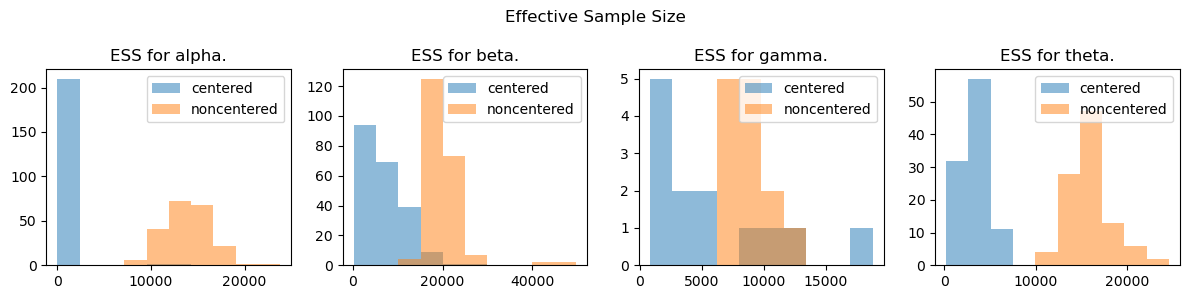

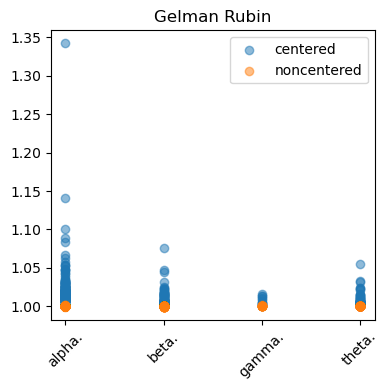

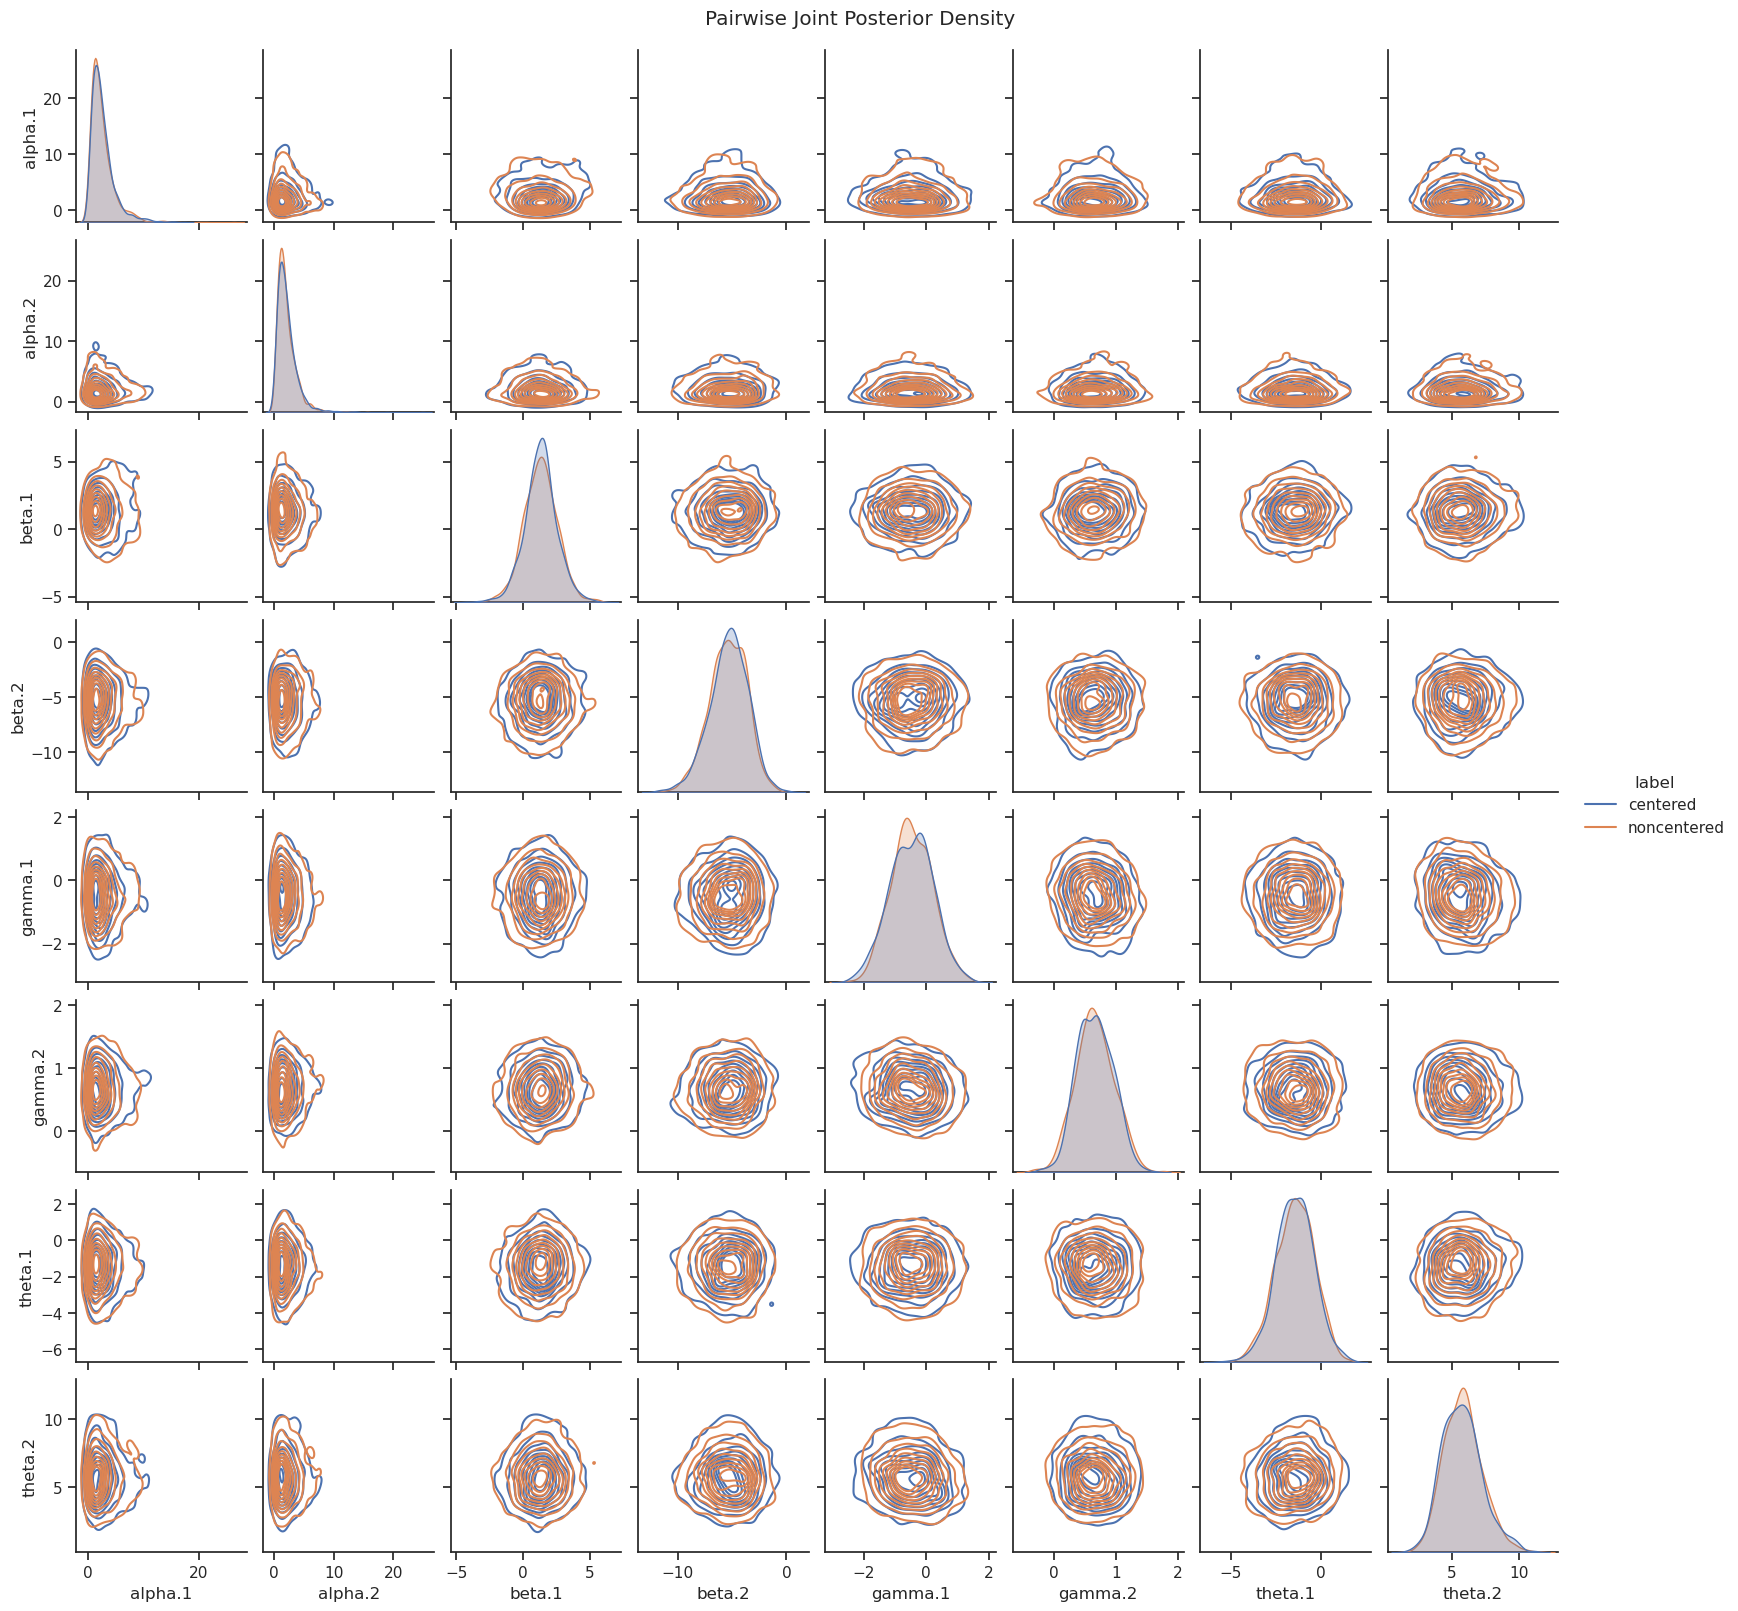

In [18]:
plot_ESS(dfs, labels, 
         params=["alpha.", "beta.", "gamma.", "theta."],
         num_chains=num_chains, num_samples=num_samples)

plot_GR(dfs, labels,
        params=["alpha.", "beta.", "gamma.", "theta."],
        num_chains=num_chains, num_samples=num_samples)

plot_posterior(dfs, labels,
               params=["alpha.1", "alpha.2", "beta.1", "beta.2", "gamma.1", "gamma.2", "theta.1", "theta.2"],
               num_subsamples=1000)